In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# (1)
Даны значения роста в трех группах случайно выбранных спортсменов:  
Футболисты: 173, 175, 180, 178, 177, 185, 183, 182.  
Хоккеисты: 177, 179, 180, 188, 177, 172, 171, 184, 180.  
Штангисты: 172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170.  
##### Провести дисперсионный анализ для определения того, есть ли различия среднего роста среди взрослых футболистов, хоккеистов и штангистов.

In [2]:
f = [173, 175, 180, 178, 177, 185, 183, 182]
h = [177, 179, 180, 188, 177, 172, 171, 184, 180]
s = [172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170]

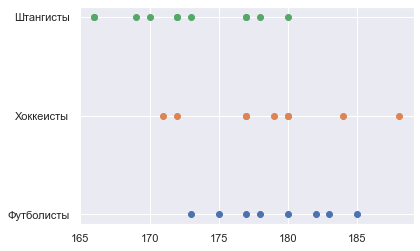

In [3]:
plt.scatter(f, ['Футболисты']*len(f))
plt.scatter(h, ['Хоккеисты']*len(h))
plt.scatter(s, ['Штангисты']*len(s))
plt.show()

In [4]:
# дисперсионная регрессия отвечает на вопрос "есть ли зависимость"
stats.f_oneway(f,h,s)

F_onewayResult(statistic=5.500053450812596, pvalue=0.010482206918698694)

##### Вывод
Так как значение pvalue получено минимальное (pvalue=0.1% - по критерию Фишера лежит далеко в правой части распределения - практически независимо от выбранного alpha), следовательно, можно сделать **вывод о наличии зависимости роста и вида спорта**.

***
***
***

In [5]:
# решение без scipy
f = np.array(f)
h = np.array(h)
s = np.array(s)

In [6]:
k = 3  # 3 категории
f_n = len(f)
h_n = len(h)
s_n = len(s)
n = f_n + h_n + s_n  # количество наблюдений

In [7]:
f_mean = f.mean()
h_mean = h.mean()
s_mean = s.mean()
y = np.hstack((f, h, s))
y_mean = y.mean()
print(f'f среднее = {f_mean}\nh среднее = {h_mean}\ns среднее = {s_mean}\nобщее среднее = {y_mean}')

f среднее = 179.125
h среднее = 178.66666666666666
s среднее = 172.72727272727272
общее среднее = 176.46428571428572


Среднее отличается, значит скорее всего есть взаимосвязь

In [8]:
# сумма квадратов отклонений всех наблюдений от общего среднего
S = 0  # общая сумма квадратных отклонений (для проверки)
for y_i in y:
    S += (y_mean - y_i) ** 2
S

830.9642857142854

In [9]:
# сумма квадратов отклонений групповых средних наблюдений от общего среднего, 
# увеличенное на объем выборки
Sf = 0  # сумма квадратных отклонений факторное
for y_i, y_n in [(f_mean, f_n), (h_mean, h_n), (s_mean, s_n)]:
    Sf += ((y_mean - y_i) ** 2) * y_n
Sf

253.9074675324678

In [10]:
# отклонение групповых наблюдений от средних по группе
Sost = 0  # сумма квадратных отклонений остаточное
for y_m, y in [(f_mean, f), (h_mean, h), (s_mean, s)]:
    for y_i in y:
        Sost += ((y_m - y_i) ** 2)
Sost

577.0568181818181

In [11]:
# проверка: Sостаточное + Sфакторное = Sобщее
if round(Sost + Sf, 6) == round(S, 6):
    print("Проверка пройдена!")
else:
    print("Проверка не пройдена!!!")

Проверка пройдена!


In [12]:
# Факторная дисперсия
Df = Sf / (k-1)  # где k - количество категорий

# Остаточная дисперсия
Do = Sost / (n-k)  # где n - количество наблюдений

print(f'Факторная дисперсия  = {Df}\nОстаточная дисперсия = {Do}')

Факторная дисперсия  = 126.9537337662339
Остаточная дисперсия = 23.082272727272724


In [13]:
# Отношение факторной дисперсии к остаточной -- критерий Фишера (расчетное значение)
F = Df / Do
print(f'Критерий Фишера (наблюдаемый) = {F}')

Критерий Фишера (наблюдаемый) = 5.500053450812599


In [14]:
# Критерий Фишера (критическое значение) для 2 степеней свободы (k-1 и n-k) и alpha = 5%
Fcrit = stats.f.ppf(0.95, k-1, n-k)
Fcrit  # оно же табличное

3.3851899614491687

In [15]:
if F > Fcrit:
    print('Различие между группами статистически значимое.')
else:
    print('Различие между группами статистически НЕ значимое!')

Различие между группами статистически значимое.
